# Tarea 3: Análisis numérico
## Resolver un problema de sloshing

Nuestra ecuación diferencial de segundo orden es la siguiente

\begin{align*}
    u'' + \left[ 1 + \varepsilon \lambda \Omega^2 \cos \Omega \tau \right] \left( u - \frac{\varepsilon^2 u^3}{6} \right) = 0
\end{align*}


Esta ecuación diferencial modela el sloshing de café como un movimiento pendular cuyo pivote varía
verticalmente en el tiempo. $u(\tau)$ es la posición vertical del pivote del péndulo, donde tau ($\tau$) es el tiempo multiplicado por la frecuencia.

Esta ecuación toma valores independientes que son: epsilon ($\epsilon$), que es un parámetro de
estabilización en la dinámica del sloshing; lambda ($\lambda$) que es la proporción de la longitud efectiva del péndulo, esto es, la distancia del pivote del péndulo al centro de masa de este, con respecto a la amplitud de oscilación; omega ($\Omega$) es el cociente entre la frecuencia y la frecuencia inicial.

Para lograr resolver la ecuación diferencial utilizando métodos numéricos se construye un sistema de ecuaciones diferenciales de grado uno.

Siendo $x_1 = u$:


\begin{align}
\begin{bmatrix}
 x'_1 \\
 x'_2 \\
\end{bmatrix} =
\begin{bmatrix}
 x_2 \\
 -\left[ 1 + \varepsilon \lambda \Omega^2 \cos \Omega \tau \right] \left( u - \frac{\varepsilon^2 u^3}{6} \right) \\
\end{bmatrix}
\end{align}

Este sistema de ecuaciones se resuelve a continuación usando el método solve_ivp de SciPy en Python, usando RK45 y variando los parámetros ($\lambda$), ($\epsilon$), ($\Omega$). Así también se resolverá usando una implementación propia del método de Euler modificado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# Definimos el sistema de ecuaciones diferenciales
def sistema(T, y):
    """
    Sistema de ED en formato requerido por SciPy
    Parametros:
    T: representa a tau (adim).
    y: representa el vector de ED.
    Retorna:
    Arreglo con sistema de las ecuaciones diferenciales.
    """

    x1, x2 = y  # y es el vector con las variables dependientes (x1, x2)
    dx1dT = x2
    dx2dT = -(1 + epsilon * lamda * omega**2 * np.cos(omega * T))*(x1 - epsilon**2 * x1**3 /6)
    return [dx1dT, dx2dT]

In [ ]:
def graficar(sol):
    """Función que grafica 3 diferentes plots:
    x1 vs tau
    x2 vs tau
    x1 vs tau
    Parámetros:
    sol: solución entregada por solve_ivp de SciPy"""
    # Grafica de x1 vs tau
    plt.plot(sol.t, sol.y[0], label='x1 = u', color='blue')
    plt.xlabel('Tau')
    plt.ylabel('Posición del pivote')
    plt.title('Solución del sistema de ecuaciones diferenciales')
    plt.legend()
    plt.grid(True)
    plt.show() # Print de la gráfica
    # Grafica de x2 vs tau
    plt.plot(sol.t, sol.y[1], label="x2 = u'", color='red')
    plt.xlabel('Tau')
    plt.ylabel('Velocidad de movimiento del pivote')
    plt.title('Solución del sistema de ecuaciones diferenciales')
    plt.legend()
    plt.grid(True)
    plt.show() # Print de la gráfica
    # Grafica de x1 vs x2
    plt.plot(sol.y[0], sol.y[1], label='x1 vs x2', color='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Espacio de estado x1 vs x2')
    plt.legend()
    plt.grid(True)
    plt.show() # Print de la gráfica

In [ ]:
# Condiciones iniciales
y0 = [0, 0.1]  # x1(0) = 0, x2(0) = 0.1

# Intervalo de tau
T_span = (0, 50)  # va de 0 a 50
T_eval = np.linspace(0, 50, 1000) #Se subdivide el intervalo en 1000 puntos

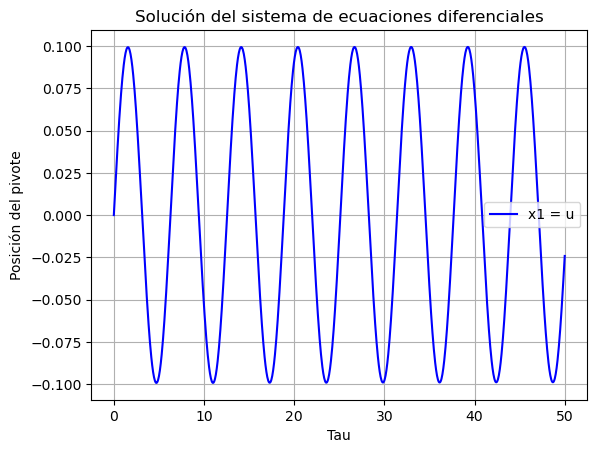

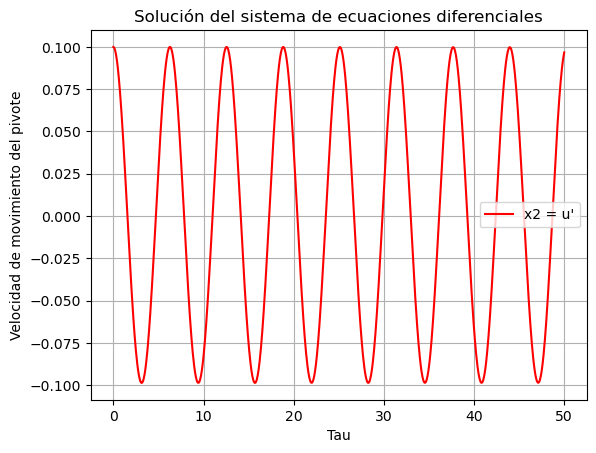

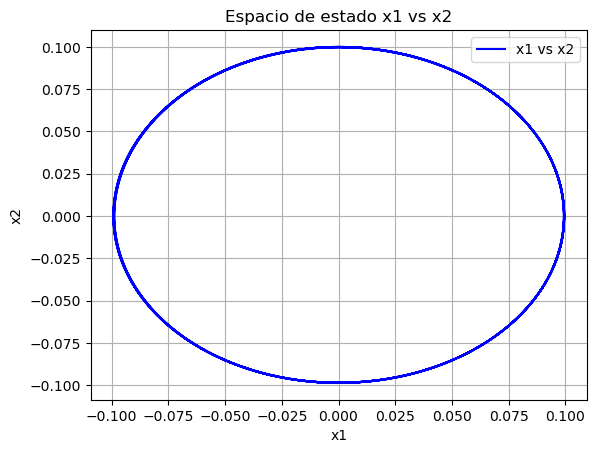

In [ ]:
#Parametros
epsilon = 0.2
lamda = 0.1
omega = 1.01

# Solucionamos el sistema de ODE con solve_ivp
sol = solve_ivp(sistema, T_span, y0, t_eval=T_eval)
#Guardamos los datos de la solución para compararlos más adelante
sol1 = sol

# Graficamos los resultados
graficar(sol)

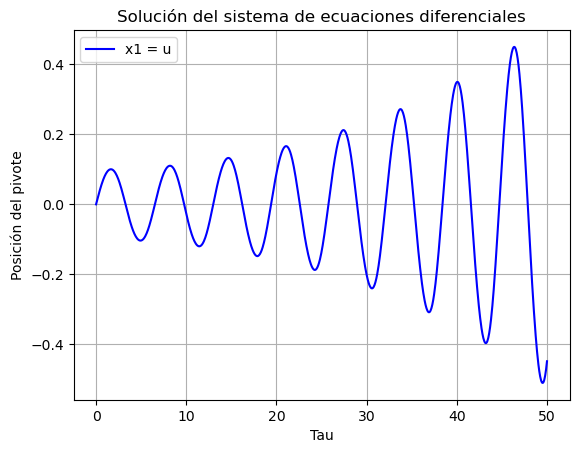

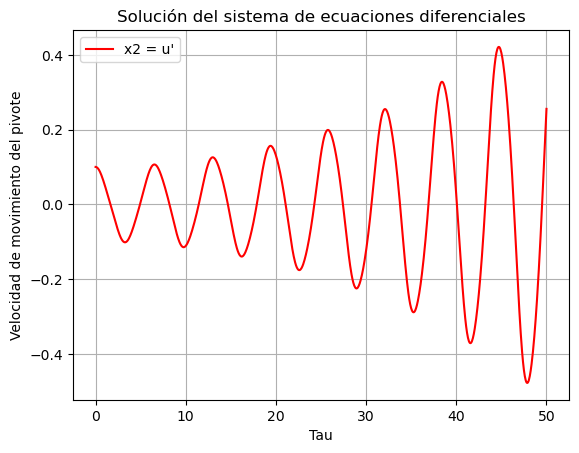

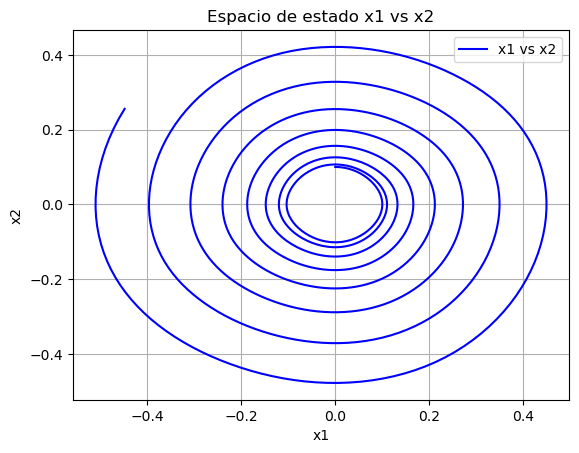

In [ ]:
#Parametros
epsilon = 0.2
lamda = 0.2
omega = 2

# Solucionamos el sistema de ODE con solve_ivp
sol = solve_ivp(sistema, T_span, y0, t_eval=T_eval)
#Guardamos los datos de la solución para compararlos más adelante
sol2 = sol

# Graficamos los resultados
graficar(sol)

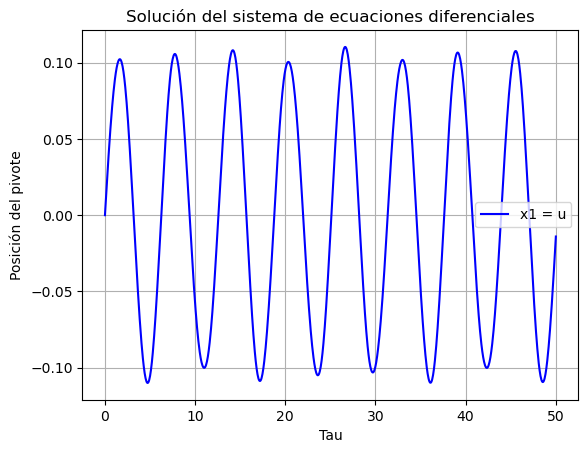

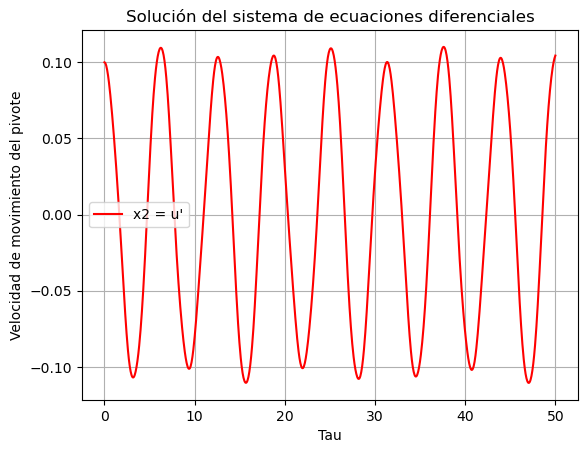

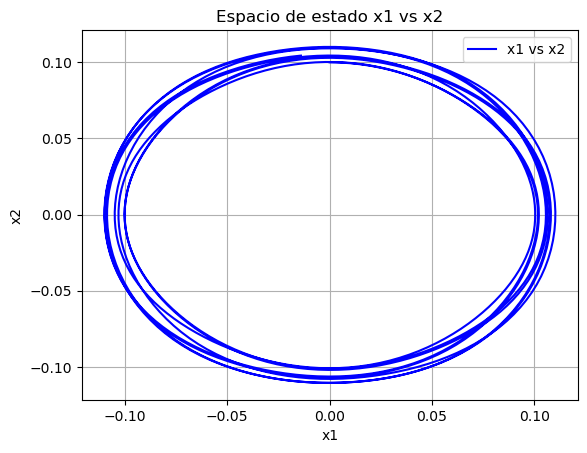

In [ ]:
#Parametros
epsilon = 0.1
lamda = 0.2
omega = 2.6

# Solucionamos el sistema de ODE con solve_ivp
sol = solve_ivp(sistema, T_span, y0, t_eval=T_eval)
#Guardamos los datos de la solución para compararlos más adelante
sol3 = sol

# Graficamos los resultados
graficar(sol)

A continuación se generará el código para Euler modificado para resolver sistemas de ecuaciones diferenciales de segundo orden y se compararán con los resultados obtenidos anteriormente, usando los mismos parámetros.

In [ ]:
def euler_modificado(epsilon, lamda, omega):
    """
    Método de Euler modificado para sistemas de ecuaciones diferenciales de segundo orden. En este caso se calcula
    con paso h=0.05, desde tau 0 a 50, con 1000 pasos.
    Retorna:
    x1: posición del pivote (array)
    x2: velocidad del pivote (array)
    time: tiempo (array)
    """
    def f(T, x1, x2, epsilon, lamda, omega):
        """Función en términos de Tau para hallar el valor de x2 dependiendo de los
        parámetros dados en epsilon, lambda, y omega."""
        return -(1 + epsilon * lamda * omega**2 * np.cos(omega * T))*(x1 - epsilon**2 * x1**3 /6)

    h = 0.05 # paso
    time = np.linspace(0, 50, 1000) #tiempo
    x1 = np.zeros_like(time)
    x2 = np.zeros_like(time)
    # Condiciones iniciales
    x1[0] = 0
    x2[0] = 0.1
    # Iteraciones según cantidad de pasos
    for idx, t in enumerate(time[:-1]):
        # Predictor de x1 y x2
        x1p = x1[idx] + h*x2[idx]
        x2p = x2[idx] + h*f(t, x1[idx], x2[idx], epsilon, lamda, omega)

        # Valor corrector para x1  y x2
        x1[idx+1] = x1[idx] + 0.5*h*(x2[idx] + x2p)
        x2[idx+1] = x2[idx] + 0.5*h*(
          f(t, x1[idx], x2[idx], epsilon, lamda, omega) + f(time[idx+1], x1p, x2p, epsilon, lamda, omega))
    return x1, x2, time

In [ ]:
def print_comparacion(time, x1, x2, sol):
    """Generación de dos gráficas, comparando resultados
    de método propio en azul con símbolos de cruces contra
    el método de Scipy con RK45. Se compara x1 con tau y x1 con x2
    para cada método."""
    #Primer plot
    plt.plot(time, x1, label='Método propio', marker='+', color="blue") #se agrega el plot propio
    plt.plot(time, sol.y[0], label='SciPy', color='red') #se agrega el plot de scipy sobre el propio
    plt.xlabel('Tau')
    plt.ylabel('Posición del pivote')
    plt.title('Solución del sistema de ecuaciones diferenciales')
    plt.legend()
    plt.grid(True)
    plt.show() # Se muestra en pantalla el gráfico
    #Segundo plot
    plt.plot(x1, x2, label='Método propio', marker='+', color='blue')#se agrega el plot propio
    plt.plot(sol.y[0], sol.y[1], label='SciPy', color='red') #se agrega el plot de scipy sobre el propio
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Espacio de estado x1 vs x2')
    plt.legend()
    plt.grid(True)
    plt.show() # Se muestra en pantalla el gráfico

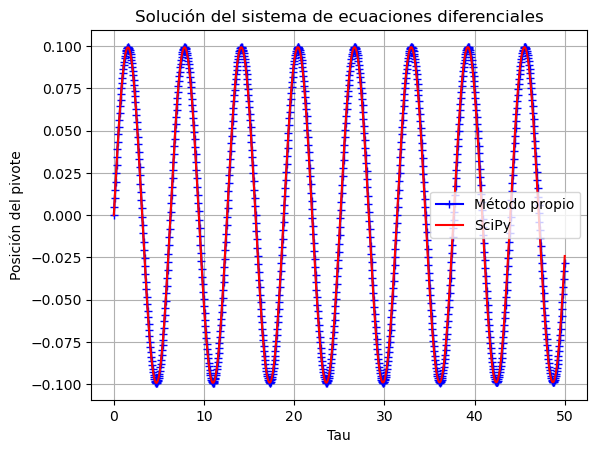

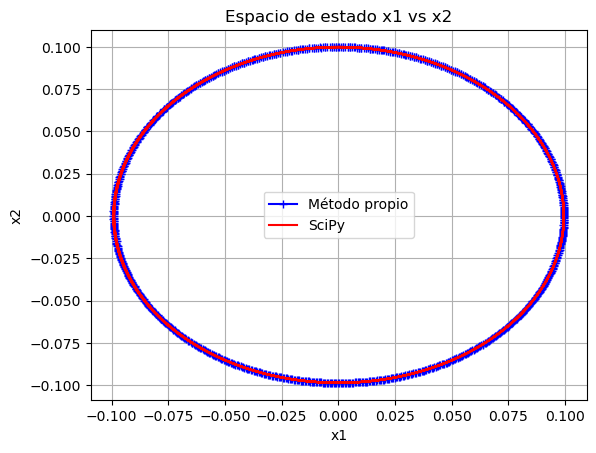

In [ ]:
#Parametros
epsilon = 0.2
lamda = 0.1
omega = 1.01

x1, x2, time = euler_modificado(epsilon, lamda, omega)

# Graficamos los resultados
print_comparacion(time, x1, x2, sol1)

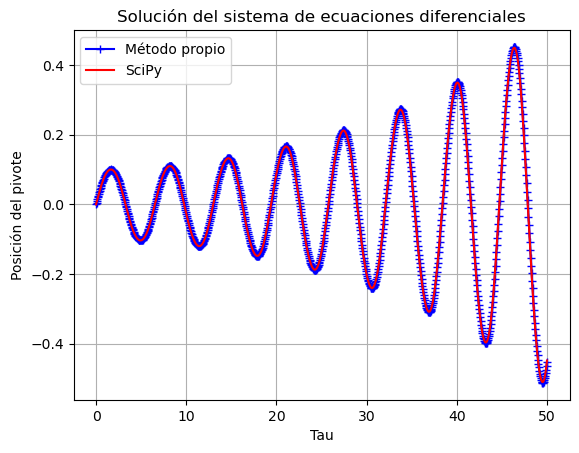

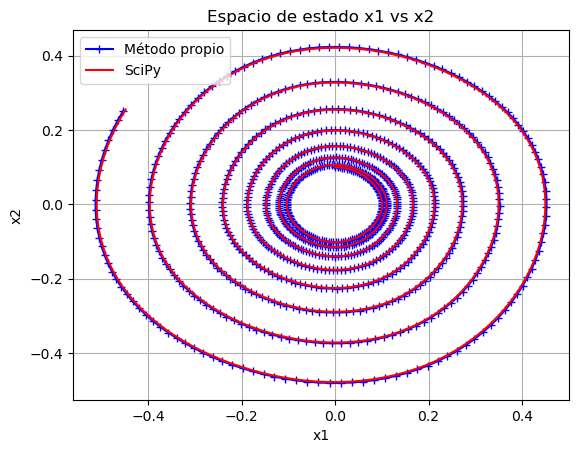

In [ ]:
#Parametros
epsilon = 0.2
lamda = 0.2
omega = 2

x1, x2, time = euler_modificado(epsilon, lamda, omega)
# Graficamos los resultados
print_comparacion(time, x1, x2, sol2)

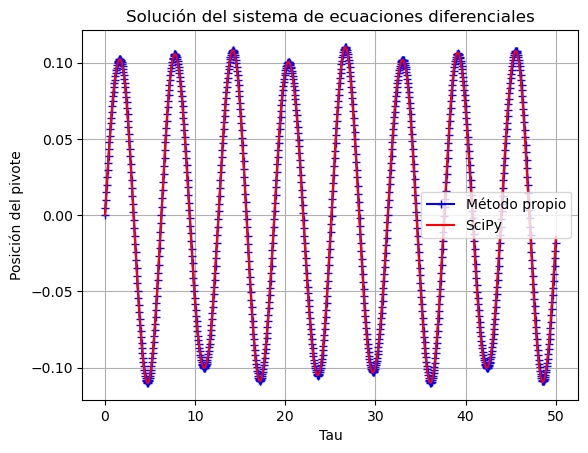

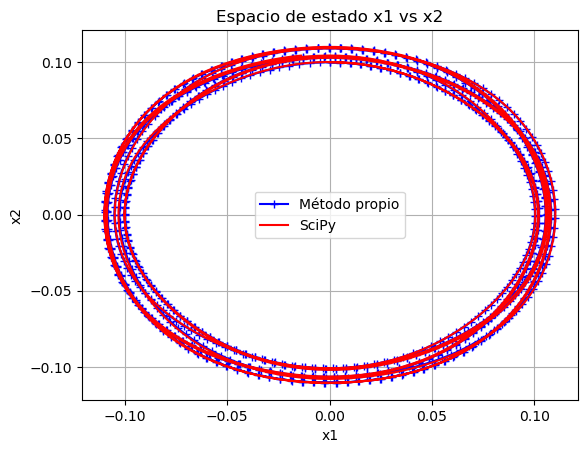

In [ ]:
#Parametros
epsilon = 0.1
lamda = 0.2
omega = 2.6
plt.close()

x1, x2, time = euler_modificado(epsilon, lamda, omega)

# Graficamos los resultados
print_comparacion(time, x1, x2, sol3)

A través de los diferentes plots se puede observar que el método de euler modificado dio resultados muy cercanos - casi idénticos - a los que se obtuvo a través de solve_ivp usando SciPy.

En relación a ambos métodos implementados, se puede evidenciar que el parámetro que modifica mayormente los distintos resultados obtenidos es omega ($\Omega$), pues este corresponde a la frecuencia del "pumping", el bombeo que experimenta la taza de café en cada paso dado por quien la lleva, lo cual imprime un nuevo impulso al líquido. Por otra parte, la escogencia de lambda ($\lambda$) habla implícitamente de la amplitud del péndulo, esto es, de la amplitud con que el café se mueve dentro de la taza, la cual es mayor a medida que la distancia al pivote es más baja; por este motivo, una escogencia baja de lambda habla de una longitud efectiva corta en relación a la amplitud del movimiento.

### Referencias
* Guarín Zapata, N. (2021, junio 23). Sloshing in coffee as a pumped pendulum.
* $\href{https://kyleniemeyer.github.io/ME373-book/content/second-order/numerical-methods.html}{Numerical Methods for Second-Order ODEs}$